In [1]:
# imports
%cd ..
import os
from tqdm.notebook import tqdm
from mango.environments import frozen_lake
from mango import Agent, Mango
from frozen_lake_tests import utils_plot, utils_save, utils_sim

/home/davide_sartor/MANGO-lite


Experiment Parameters

In [2]:
# parameters for the environment
map_base = 2
map_scale = 2
p_frozen = [0.4]
one_shot = True

plot_vanilla_agent = False
plot_nomask_mango_agent = False

rerun [0.0, 0.0, 0.0, 0.0]


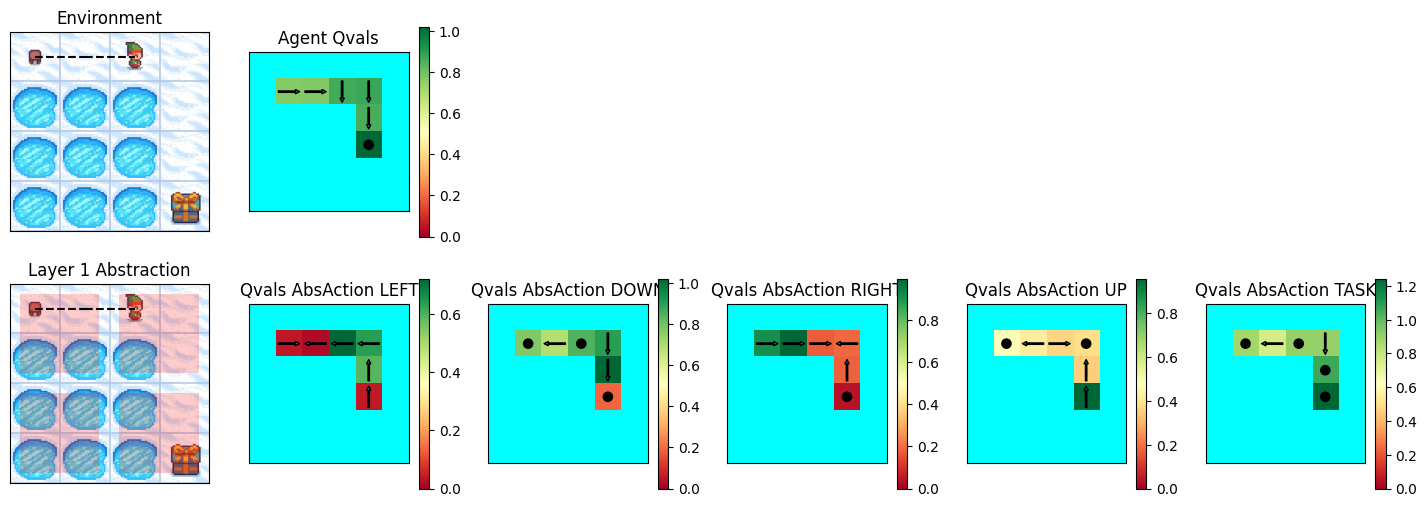

In [3]:
if isinstance(p_frozen, float):
    p_frozen = [p_frozen]
for p in p_frozen:
    dir_path = utils_save.path_to_save_dir(map_base, map_scale, p, one_shot)
    files = sorted(os.listdir(dir_path + "models/"))
    mango_agent_files = [name for name in files if name.startswith("mango_agent")]
    run_ids = [f"run_{name[-9:-7]}" for name in mango_agent_files]
    mango_agents = [
        utils_save.load_from_file(dir_path + "models/" + file_name)
        for file_name in mango_agent_files
    ]

    agents_list, labels, colors = [mango_agents], ["mango"], ["tab:orange"]
    if plot_vanilla_agent:
        normal_agent_files = [name for name in files if name.startswith("normal_agent")]
        normal_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in normal_agent_files
        ]
        agents_list.append(normal_agents)
        labels.append("vanilla")
        colors.append("tab:blue")
    if plot_nomask_mango_agent:
        mango_nomask_agent_files = [name for name in files if name.startswith("nomask_mango_agent")]
        mango_nomask_agents = [
            utils_save.load_from_file(dir_path + "models/" + file_name)
            for file_name in mango_nomask_agent_files
        ]
        agents_list.append(mango_nomask_agents)
        labels.append("mango_nomask")
        colors.append("tab:green")

    os.makedirs(dir_path + "qvalues/", exist_ok=True)
    for agents, run_id_str in zip(zip(*agents_list), run_ids):
        for agent, label, color in zip(agents, labels, colors):
            trajectory, rewards = agent.run_episode(randomness=0.0, episode_length=4**map_scale)
            while rewards[-1] == 1.0:
                trajectory, rewards = agent.run_episode(randomness=0.0, episode_length=4**map_scale)
                print("rerun", rewards)
            if isinstance(agent, Mango):
                frozen_lake.plot_utils.plot_all_qvals_mango_agent(
                    agent, trajectory, save_path=f"{dir_path}qvalues/qvalues_{run_id_str}_{label}.pdf"
                )
            else:
                frozen_lake.plot_utils.plot_all_qvals_normal_agent(
                    agent, trajectory, save_path=f"{dir_path}qvalues/qvalues_{run_id_str}_{label}.pdf"
                )
            break